In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

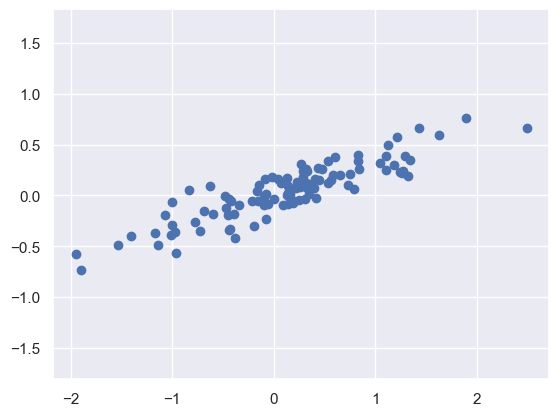

In [2]:
dataset = np.random.RandomState(1)
X = np.dot(dataset.rand(2, 2), dataset.randn(2, 100)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]


In [5]:
print(pca.explained_variance_)  #rozptyl

[0.71323427 0.01483411]


In [6]:
print(pca.explained_variance_ratio_)

[0.97962538 0.02037462]


(-2.170255554178351,
 2.711338341643358,
 -0.8112002823393254,
 0.8394427482643845)

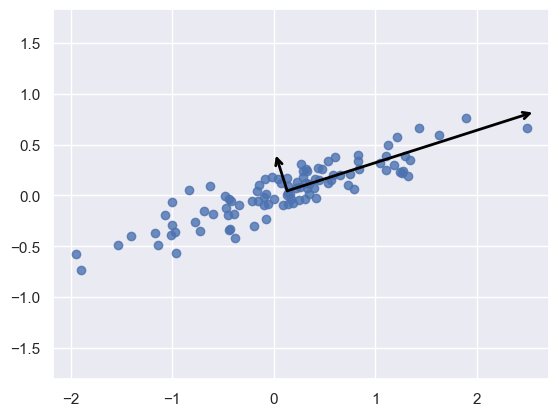

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', color='black', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

#plot data
plt.scatter(X[:, 0], X[:, 1], alpha = 0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)

original shape:  (100, 2)
transformed shape:  (100, 1)


(-2.170255554178351,
 2.711338341643358,
 -0.8122667618557948,
 0.8618388181102417)

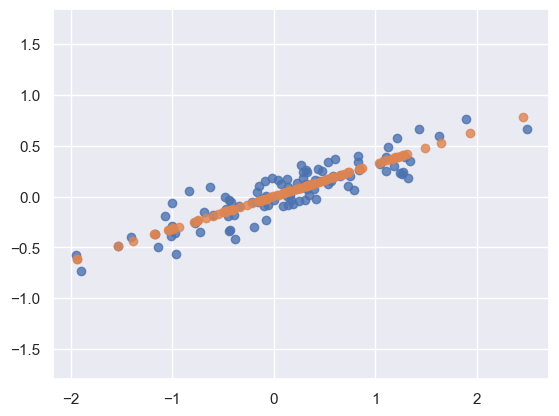

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')